<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data_multi_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.157276,14.313323,55.470599,159.989087,-104.518488
1,0.0,1.0,75.728583,-45.768166,39.960417,296.598738,-256.638321
2,0.0,2.0,24.130058,-532.585940,-498.455883,138.450885,-636.906768
3,0.0,3.0,50.979567,-2392.269040,-2331.289473,220.743784,-2552.033257
4,0.0,4.0,53.986502,1006.130871,1070.117373,229.959945,840.157427
...,...,...,...,...,...,...,...
29995,999.0,25.0,70.768023,-127.613012,-46.844989,-1166.553772,1119.708782
29996,999.0,26.0,36.538112,77.094931,123.633042,1176.609882,-1052.976840
29997,999.0,27.0,94.528790,-9977.363292,-9872.834503,-2793.065912,-7079.768591
29998,999.0,28.0,68.594934,908.982868,987.577802,-1017.797846,2005.375648


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.157276,14.313323,55.470599,159.989087,-104.518488
1,0.0,1.0,75.728583,-45.768166,39.960417,296.598738,-256.638321
2,0.0,2.0,24.130058,-532.585940,-498.455883,138.450885,-636.906768
3,0.0,3.0,50.979567,-2392.269040,-2331.289473,220.743784,-2552.033257
4,0.0,4.0,53.986502,1006.130871,1070.117373,229.959945,840.157427
...,...,...,...,...,...,...,...
29995,999.0,25.0,70.768023,-127.613012,-46.844989,-1166.553772,1119.708782
29996,999.0,26.0,36.538112,77.094931,123.633042,1176.609882,-1052.976840
29997,999.0,27.0,94.528790,-9977.363292,-9872.834503,-2793.065912,-7079.768591
29998,999.0,28.0,68.594934,908.982868,987.577802,-1017.797846,2005.375648


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    31.157276    14.313323    55.470599   159.989087  -104.518488
      1.0    75.728583   -45.768166    39.960417   296.598738  -256.638321
      2.0    24.130058  -532.585940  -498.455883   138.450885  -636.906768
      3.0    50.979567 -2392.269040 -2331.289473   220.743784 -2552.033257
      4.0    53.986502  1006.130871  1070.117373   229.959945   840.157427
...                ...          ...          ...          ...          ...
999.0 25.0   70.768023  -127.613012   -46.844989 -1166.553772  1119.708782
      26.0   36.538112    77.094931   123.633042  1176.609882 -1052.976840
      27.0   94.528790 -9977.363292 -9872.834503 -2793.065912 -7079.768591
      28.0   68.594934   908.982868   987.577802 -1017.797846  2005.375648
      29.0   48.686627 -2754.858895 -2696.172267   344.999169 -3041.171436

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    31.157276    14.313323    55.470599   159.989087  -104.518488
      1.0    75.728583   -45.768166    39.960417   296.598738  -256.638321
      2.0    24.130058  -532.585940  -498.455883   138.450885  -636.906768
      3.0    50.979567 -2392.269040 -2331.289473   220.743784 -2552.033257
      4.0    53.986502  1006.130871  1070.117373   229.959945   840.157427
...                ...          ...          ...          ...          ...
999.0 25.0   70.768023  -127.613012   -46.844989 -1166.553772  1119.708782
      26.0   36.538112    77.094931   123.633042  1176.609882 -1052.976840
      27.0   94.528790 -9977.363292 -9872.834503 -2793.065912 -7079.768591
      28.0   68.594934   908.982868   987.577802 -1017.797846  2005.375648
      29.0   48.686627 -2754.858895 -2696.172267   344.999169 -3041.171436

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.157276,14.313323,55.470599,159.989087,-104.518488
1,0.0,1.0,75.728583,-45.768166,39.960417,296.598738,-256.638321
2,0.0,2.0,24.130058,-532.585940,-498.455883,138.450885,-636.906768
3,0.0,3.0,50.979567,-2392.269040,-2331.289473,220.743784,-2552.033257
4,0.0,4.0,53.986502,1006.130871,1070.117373,229.959945,840.157427
...,...,...,...,...,...,...,...
29995,999.0,25.0,70.768023,-127.613012,-46.844989,-1166.553772,1119.708782
29996,999.0,26.0,36.538112,77.094931,123.633042,1176.609882,-1052.976840
29997,999.0,27.0,94.528790,-9977.363292,-9872.834503,-2793.065912,-7079.768591
29998,999.0,28.0,68.594934,908.982868,987.577802,-1017.797846,2005.375648


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    31.157276    14.313323    55.470599   159.989087  -104.518488
      1.0    75.728583   -45.768166    39.960417   296.598738  -256.638321
      2.0    24.130058  -532.585940  -498.455883   138.450885  -636.906768
      3.0    50.979567 -2392.269040 -2331.289473   220.743784 -2552.033257
      4.0    53.986502  1006.130871  1070.117373   229.959945   840.157427
...                ...          ...          ...          ...          ...
999.0 25.0   70.768023  -127.613012   -46.844989 -1166.553772  1119.708782
      26.0   36.538112    77.094931   123.633042  1176.609882 -1052.976840
      27.0   94.528790 -9977.363292 -9872.834503 -2793.065912 -7079.768591
      28.0   68.594934   908.982868   987.577802 -1017.797846  2005.375648
      29.0   48.686627 -2754.858895 -2696.172267   344.999169 -3041.171436

[30000 rows x 5 columns]

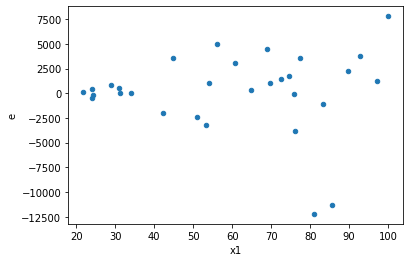

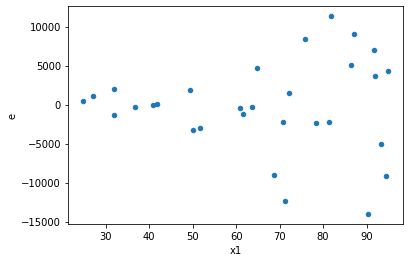

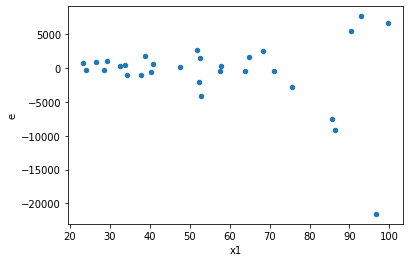

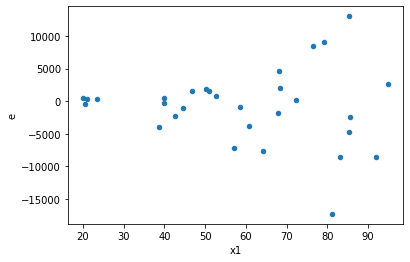

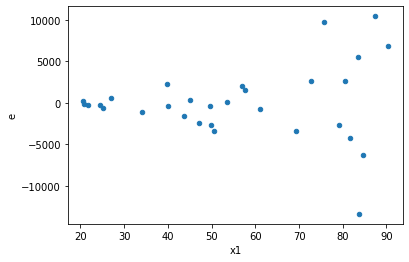

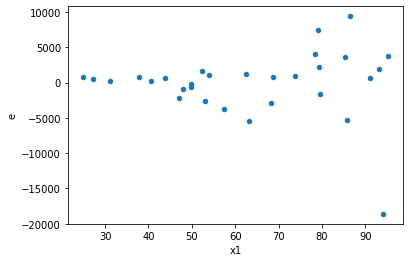

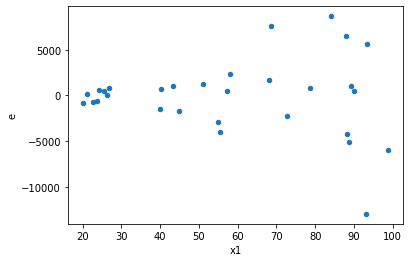

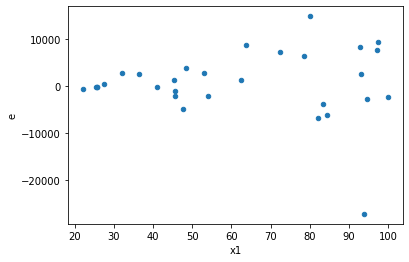

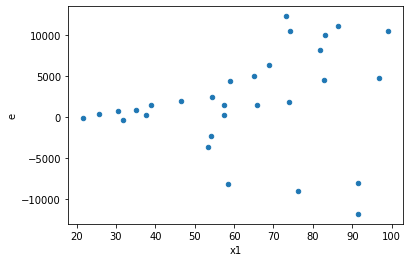

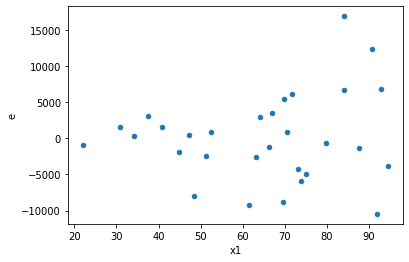

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x1')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,11.0,28112222.830141,354713412.1823299,2555656.6209219093,32246673.834757265,12.61776467572738,0.00020899302708277112,0.9998955034864586,0.00010449651354138556,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,24774141.799605537,606691148.9284352,2252194.709055049,55153740.81167593,24.488886591344816,7.619146822346323e-06,0.9999961904265888,3.8095734111731616e-06,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,8095646.866736375,707606212.3346851,735967.896976034,64327837.484971374,87.40576559016152,9.084183183460937e-09,0.9999999954579084,4.542091591730468e-09,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,30750523.00334647,782807702.6752112,2795502.0912133153,71164336.60683738,25.456728088495307,6.242138051781865e-06,0.9999968789309741,3.1210690258909324e-06,Reject001=0 : Heteroscedasticity
4.0,11.0,11.0,13852427.533424126,539744638.3291342,1259311.5939476478,49067694.39355766,38.96390268252982,6.788270632274163e-07,0.9999996605864684,3.3941353161370813e-07,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,14067147.058383306,505062367.3691357,1278831.5507621188,45914760.66992143,35.90368148374081,1.0436321633555679e-06,0.9999994781839183,5.218160816777839e-07,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,9274898.243560743,383822457.8571276,843172.5675964311,34892950.71428433,41.382929254625836,4.940707392098176e-07,0.9999997529646304,2.470353696049088e-07,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,39207652.40732227,1313102225.090272,3564332.0370292976,119372929.5536611,33.490967820481956,1.5026133364237637e-06,0.9999992486933318,7.513066682118819e-07,Reject001=0 : Heteroscedasticity
8.0,11.0,11.0,31198789.761074957,805939779.2402642,2836253.614643178,73267252.65820584,25.832405212262167,5.788359356495576e-06,0.9999971058203218,2.894179678247788e-06,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,28112222.830141,354713412.1823299,2555656.6209219093,32246673.834757265,12.61776467572738,0.00020899302708277112,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,24774141.799605537,606691148.9284352,2252194.709055049,55153740.81167593,24.488886591344816,7.619146822346323e-06,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,8095646.866736375,707606212.3346851,735967.896976034,64327837.484971374,87.40576559016152,9.084183183460937e-09,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,30750523.00334647,782807702.6752112,2795502.0912133153,71164336.60683738,25.456728088495307,6.242138051781865e-06,Reject001=0 : Heteroscedasticity
4.0,11.0,11.0,13852427.533424126,539744638.3291342,1259311.5939476478,49067694.39355766,38.96390268252982,6.788270632274163e-07,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,14067147.058383306,505062367.3691357,1278831.5507621188,45914760.66992143,35.90368148374081,1.0436321633555679e-06,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,9274898.243560743,383822457.8571276,843172.5675964311,34892950.71428433,41.382929254625836,4.940707392098176e-07,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,39207652.40732227,1313102225.090272,3564332.0370292976,119372929.5536611,33.490967820481956,1.5026133364237637e-06,Reject001=0 : Heteroscedasticity
8.0,11.0,11.0,31198789.761074957,805939779.2402642,2836253.614643178,73267252.65820584,25.832405212262167,5.788359356495576e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    946
Reject001=1 : Homoscedasticity       54
Name: Result_test, dtype: int64